In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
cust = pd.read_csv("cust_demographics.csv")
claims = pd.read_csv('claims.csv')

In [3]:
print(cust.shape, claims.shape)
print(cust.info())
print(claims.info())

(1085, 6) (1100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 n

In [4]:
cust.tail()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver
1084,61575264,Male,12-Jul-95,WY,182-385-1392,Gold


In [5]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
cust_claims = pd.merge(left=cust,right=claims,left_on='CUST_ID',right_on='customer_id')
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [7]:
cust_claims.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
cust_claims.DateOfBirth = pd.to_datetime(cust_claims.DateOfBirth,format='%d-%b-%y')
cust_claims.claim_date = pd.to_datetime(cust_claims.claim_date,format='%m/%d/%Y')

In [9]:
cust_claims.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

The histogram shows us clearly that there are some incorrectly formated dates


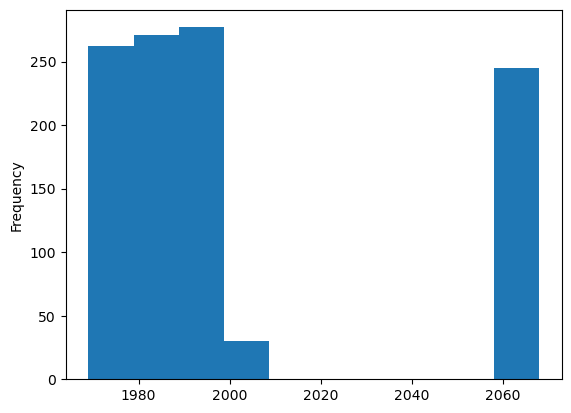

In [10]:
cust_claims.DateOfBirth.dt.year.plot(kind='hist')
print("The histogram shows us clearly that there are some incorrectly formated dates")
plt.show()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\2535426137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims.DateOfBirth.iloc[change_ind] = (cust_claims.DateOfBirth.iloc[change_ind]\


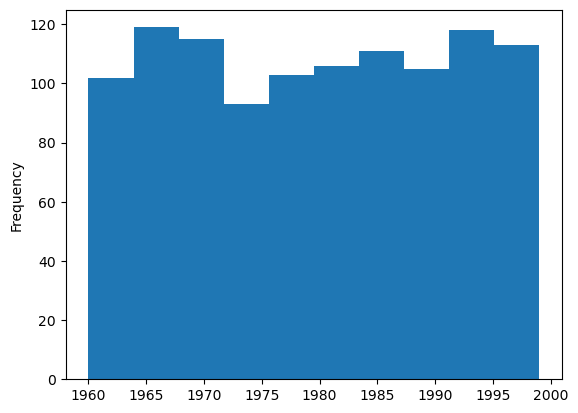

The outliers have been treated


In [11]:
change_ind = cust_claims[(cust_claims.DateOfBirth.dt.year>2030)].index
cust_claims.DateOfBirth.iloc[change_ind] = (cust_claims.DateOfBirth.iloc[change_ind]\
                                            - pd.DateOffset(years=100))
cust_claims.DateOfBirth.dt.year.plot(kind='hist')
plt.show()
print("The outliers have been treated")

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [12]:
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$',"").astype(float)
cust_claims.claim_amount

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\1362068534.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$',"").astype(float)


0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [13]:
cust_claims['police_rep_flag'] = cust_claims.police_report.where(cust_claims.police_report == 'Yes', 0)
cust_claims['police_rep_flag'] = cust_claims.police_rep_flag.where(cust_claims.police_rep_flag==0, 1)
cust_claims.police_rep_flag = cust_claims.police_rep_flag.astype('int')
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_rep_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [14]:
cust_claims.CUST_ID.drop_duplicates().index

Int64Index([   0,    1,    2,    4,    6,    8,   10,   11,   12,   13,
            ...
            1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084],
           dtype='int64', length=1078)

In [15]:
cust_claims = cust_claims.iloc[cust_claims.CUST_ID.drop_duplicates().index].reset_index()\
                                    .drop(columns='index')
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_rep_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
4,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1074,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1075,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1076,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [16]:
print("The number of missing Continious values is",'\n',cust_claims.select_dtypes('number').isna().sum())
print("The number of missing Categoriacal values is",'\n',cust_claims.select_dtypes('object').isna().sum())

The number of missing Continious values is 
 CUST_ID                 0
claim_id                0
customer_id             0
claim_amount           65
total_policy_claims    10
police_rep_flag         0
dtype: int64
The number of missing Categoriacal values is 
 gender            0
State             0
Contact           0
Segment           0
incident_cause    0
claim_area        0
police_report     0
claim_type        0
fraudulent        0
dtype: int64


In [17]:
cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean(), inplace=True)
cust_claims.total_policy_claims.fillna(cust_claims.total_policy_claims.mean(), inplace=True)

In [18]:
print("The number of missing Continious values is",'\n',cust_claims.select_dtypes('number').isna().sum())
print("The number of missing Categoriacal values is",'\n',cust_claims.select_dtypes('object').isna().sum())

The number of missing Continious values is 
 CUST_ID                0
claim_id               0
customer_id            0
claim_amount           0
total_policy_claims    0
police_rep_flag        0
dtype: int64
The number of missing Categoriacal values is 
 gender            0
State             0
Contact           0
Segment           0
incident_cause    0
claim_area        0
police_report     0
claim_type        0
fraudulent        0
dtype: int64


#### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
Children < 18,
Youth 18-30,
Adult 30-60,
Senior > 60


In [19]:
cust_claims.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_rep_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0


In [20]:
cur_date = datetime.now()
cur_date

datetime.datetime(2024, 2, 12, 12, 4, 39, 841742)

In [21]:
((cur_date - cust_claims.DateOfBirth)/365.25).dt.days

0       45
1       54
2       39
3       37
4       46
        ..
1073    42
1074    27
1075    33
1076    59
1077    28
Name: DateOfBirth, Length: 1078, dtype: int64

In [22]:
cust_claims['Age'] = ((cur_date - cust_claims.DateOfBirth)/365.25).dt.days

In [23]:
cust_claims['Age_Group'] = pd.cut(cust_claims.Age,bins=[0,18,30,60,100],
                                  labels=['Child','Youth','Adult','Senior'])

In [24]:
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_rep_flag,Age,Age_Group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,45,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,54,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,39,Adult
3,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,37,Adult
4,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,46,Adult


#### 8. What is the average amount claimed by the customers from various segments?

In [25]:
pd.DataFrame(cust_claims.groupby("Segment")['claim_amount'].mean())\
            .rename(columns={'claim_amount':'Mean Claim Amount'})

,Mean Claim Amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [26]:
bef_oct1 = cust_claims[cust_claims.claim_date < '2018-09-11']
pd.DataFrame(bef_oct1.groupby('incident_cause')['claim_amount'].sum())\
        .rename(columns={'claim_amount':'Total Claims before Sep 11 2018'})

,Total Claims before Sep 11 2018
incident_cause,
Crime,7.244625e+05
Driver error,3.264286e+06
Natural causes,1.312706e+06
Other causes,3.725038e+06
Other driver error,3.318806e+06


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [27]:
req = (((cust_claims.State == 'TX') |(cust_claims.State == 'DE') | (cust_claims.State == 'AK')) &\
 ((cust_claims.incident_cause == 'Driver error') | (cust_claims.incident_cause == 'Other driver error')) &\
       (cust_claims.Age_Group == 'Adult')).sum()
print("The Number of Adults satisfying the above conditions are:",req)

The Number of Adults satisfying the above conditions are: 27


#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [28]:
gen_seg = pd.DataFrame(cust_claims.groupby(['gender','Segment'])['claim_amount'].sum())
gen_seg

claim_amount
gender Segment               
Female Gold      2.109763e+06
       Platinum  2.369503e+06
       Silver    1.898558e+06
Male   Gold      2.622890e+06
       Platinum  2.095815e+06
       Silver    2.346666e+06

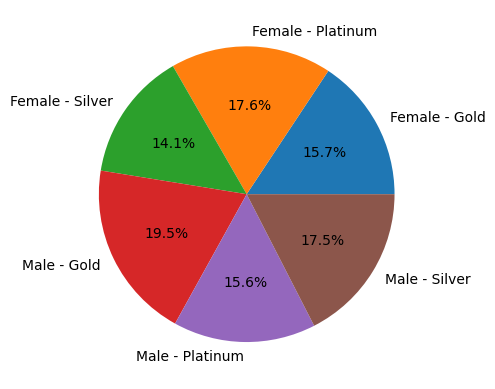

In [29]:
claim_amount = gen_seg['claim_amount']
labels = [f"{gender} - {segment}" for gender, segment in gen_seg.index]
plt.pie(claim_amount, labels=labels, autopct='%1.1f%%')
plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [30]:
cust_claims.incident_cause.unique()

array(['Driver error', 'Crime', 'Other driver error', 'Natural causes',
       'Other causes'], dtype=object)

In [31]:
driver_er = cust_claims[(cust_claims.incident_cause=='Driver error') |\
            (cust_claims.incident_cause=='Other driver error')]
driver_er

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_rep_flag,Age,Age_Group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,45,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,39,Adult
5,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0,46,Adult
6,18401412,Male,1999-03-02,AR,752-398-2914,Gold,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,0,24,Youth
10,99103685,Female,1985-12-30,KY,764-439-9856,Gold,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,0,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,82089910,Male,1973-10-09,FL,257-248-4825,Silver,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,0,50,Adult
1071,6756905,Male,1997-10-21,NE,924-427-8125,Silver,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,0,26,Youth
1073,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1,42,Adult
1075,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1,33,Adult


Amount Claimed by each gender with driver related issues of any kind gender
Female    3.137731e+06
Male      3.938907e+06
Name: claim_amount, dtype: float64


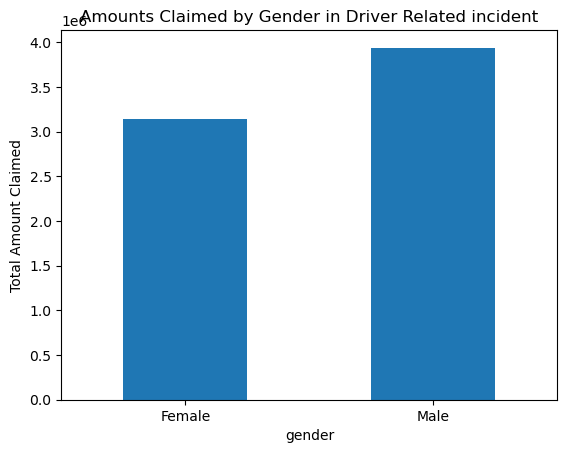

In [32]:
print("Amount Claimed by each gender with driver related issues of any kind",
              driver_er.groupby('gender')['claim_amount'].sum())
driver_er.groupby('gender')['claim_amount'].sum().plot(kind='bar', rot=0)
plt.ylabel("Total Amount Claimed")
plt.title("Amounts Claimed by Gender in Driver Related incident")
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

           Count of Fraud
Age_Group                
Adult                 187
Youth                  39
Senior                 21
Child                   0

The age group committing the most fraudulent activities is: Adult


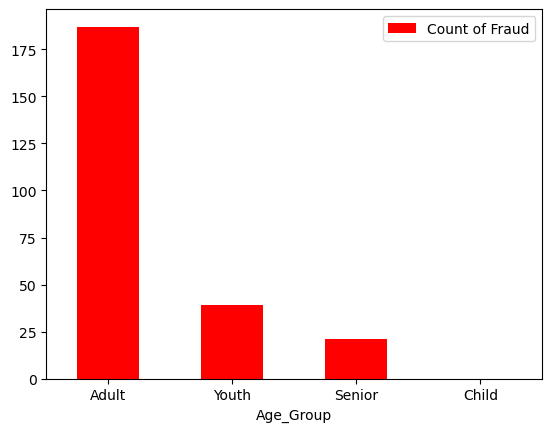

In [33]:
fraud = cust_claims[cust_claims.fraudulent == 'Yes']
fraud_grp = pd.DataFrame(fraud.groupby('Age_Group')['CUST_ID'].count().sort_values(ascending=False))\
            .rename(columns={'CUST_ID':'Count of Fraud'})
fraud_grp.plot(kind='bar',rot=0,color='r')
print(fraud_grp)
print()
print('The age group committing the most fraudulent activities is:',fraud_grp.index[0])
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [34]:
month = pd.DataFrame(cust_claims.groupby(cust_claims.claim_date.dt.month_name())['claim_amount'].sum())

In [35]:
month

,claim_amount
claim_date,
April,1.276071e+06
August,9.112035e+05
December,6.967015e+05
February,1.133107e+06
January,1.332012e+06
July,1.379035e+06
June,1.276333e+06
March,1.320094e+06
May,1.114211e+06


In [36]:
order = ['January','February','March','April',
         'May','June','July','August','September','October','November','December']

In [37]:
order_month =  month.loc[order]
order_month

,claim_amount
claim_date,
January,1.332012e+06
February,1.133107e+06
March,1.320094e+06
April,1.276071e+06
May,1.114211e+06
June,1.276333e+06
July,1.379035e+06
August,9.112035e+05
September,9.806480e+05


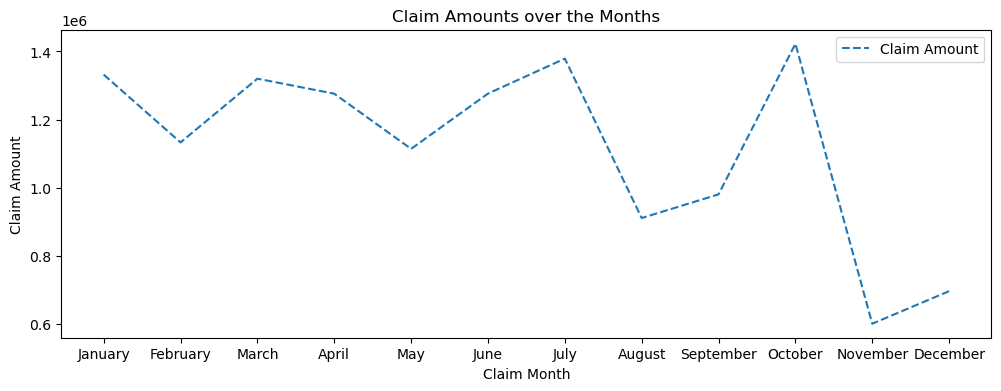

In [38]:
plt.figure(figsize=(12,4))
plt.plot(order_month.index,order_month['claim_amount'],label='Claim Amount',ls='--')
plt.xlabel("Claim Month")
plt.ylabel("Claim Amount")
plt.title('Claim Amounts over the Months')
plt.legend()
plt.show()

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

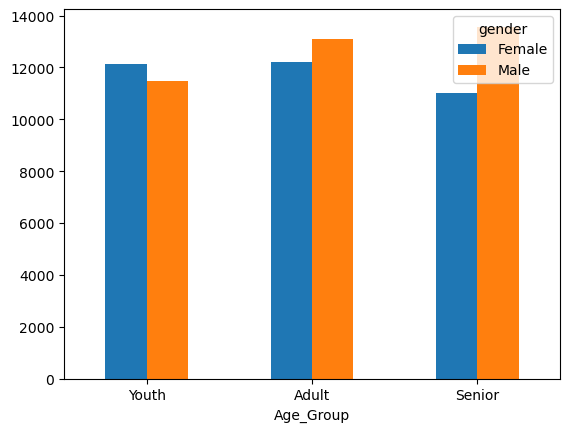

In [39]:
pd.pivot_table(data=cust_claims,index='Age_Group',columns='gender',values='claim_amount',aggfunc='mean')\
        .plot(kind='bar',rot=0)
plt.show()

#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

#### 16. Is there any similarity in the amount claimed by males and females?


     Hypothesis Testing

*Null Hypothesis H0 : there is similarity in the amounts claimed by males and females*
MU(m) = MU(f)


*Alternate Hypothesis Ha : there is no similarity in the amounts claimed by males and females*
MU(m) != MU(f)

*Significance Level: alpha = 0.05*

In [40]:
from scipy.stats import stats

In [41]:
male_claims = cust_claims[cust_claims.gender == 'Male']['claim_amount']
female_claims = cust_claims[cust_claims.gender == 'Female']['claim_amount']

In [42]:
stats.ttest_ind(male_claims,female_claims)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\2031986513.py:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(male_claims,female_claims)


Ttest_indResult(statistic=0.8848703612768548, pvalue=0.3764242430541366)

    The t-value measures the difference in means in terms of standard deviations. In this case, the positive t-value indicates that the average claim amount for males is higher than females, but the magnitude is not very large.

    since the p value is greater than the significance level choosen, There is insufficient evidence to conclude that there is a statistically significant difference in the mean amount claimed by males and females. So we reject the Alternate Hypothesis 

#### 17. Is there any relationship between age category and segment?

    Null Hypothesis (H0) : There is no relationship between the categories 
    
    Alternate Hypothesis (Ha) : There is some relationship between the categorical 
    columns
    
    Significance Level (alpha) : 0.05

In [43]:
from scipy.stats import chi2_contingency

In [44]:
age_segment = cust_claims[['Segment','Age_Group']]
age_segment

,Segment,Age_Group
0,Platinum,Adult
1,Silver,Adult
2,Silver,Adult
3,Silver,Adult
4,Gold,Adult
...,...,...
1073,Platinum,Adult
1074,Silver,Youth
1075,Gold,Adult
1076,Silver,Adult


In [45]:
data = pd.crosstab(index=age_segment['Segment'],columns=age_segment['Age_Group'])
data

Age_Group,Youth,Adult,Senior
Segment,,,
Gold,69,273,29
Platinum,69,266,26
Silver,66,259,21


In [46]:
chi2_contingency(data)

(0.8725867572764416,
 0.9284603278838651,
 4,
 array([[ 70.20779221, 274.63636364,  26.15584416],
        [ 68.31539889, 267.23376623,  25.45083488],
        [ 65.47680891, 256.12987013,  24.39332096]]))

    The chi-square statistic measures the association between 'Age Category' and 
    'Segment'.In this case, the calculated chi-square statistic is approximately 0.879
    
    The p-value is approximately 0.928. This is greater than the chosen significance 
    level (0.05)
    
    Degrees of Freedom = (Number of Age categories -1)*(Number of Segment Categories -1) = 4


                                        Conclusions
    Since the p-value (0.928) is greater than the significance level (0.05), we fail to 
    reject the null hypothesis. We then can rejecet the Alternate Hypothesis that there is some relation btw the categorical columns age category and segment.                                        
                                       

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

    Null Hypothesis(H0): There is no significant rise in claim amounts as compared to the previous year
    Alternate Hypothesis(Ha): There is significant rise in claim amounts as compared to  the previous year
    Significance Level(alpha): 0.05

In [53]:
cust_claims.claim_amount.mean()

12470.498519249753

In [52]:
from scipy.stats import stats

In [54]:
stats.ttest_1samp(cust_claims.claim_amount,10000)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\2633340357.py:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_1samp(cust_claims.claim_amount,10000)


Ttest_1sampResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09)


    The t-statistic is approximately 6.07. This value represents the number of standard  errors the sample mean is from the hypothesized population mean ($10,000) under the   null hypothesis.
    
    The p-value associated with the t-statistic is approximately 1.78e-09 (or approximately 0.00000000178). This p-value is extremely small, much smaller than commonly used significance levels like 0.05 or 0.01. It indicates the probability of observing the data (or something more extreme) if the null hypothesis were true. Since this p-value is significantly smaller than any reasonable significance level, we reject the null hypothesis.
    
    

#### 19. Is there any difference between age groups and insurance claims?

    Null Hypthesis(H0): There is no difference between the age groups and the insurance  claims
    
    Alternate Hypothesis(Ha): There is some difference between the age groups and claims
    
    Significance Level(alpha): 0.05

In [61]:
cust_claims.groupby('Age_Group')['claim_amount'].mean()

Age_Group
Child              NaN
Youth     11808.151845
Adult     12652.818846
Senior    12334.013002
Name: claim_amount, dtype: float64

In [69]:
youth = cust_claims[cust_claims.Age_Group == 'Youth'].loc[:,'claim_amount']
adult = cust_claims[cust_claims.Age_Group == 'Adult'].loc[:,'claim_amount']
senior = cust_claims[cust_claims.Age_Group == 'Senior'].loc[:,'claim_amount']
youth.head()

6      1730.000000
7      1160.000000
8      2620.000000
11    16690.000000
22    12470.498519
Name: claim_amount, dtype: float64

In [70]:
adult.head()

0    2980.0
1    2980.0
2    3369.5
3    1680.0
4    2680.0
Name: claim_amount, dtype: float64

In [71]:
senior.head()

28     1210.000000
65    33190.000000
67    25830.000000
91    12470.498519
95     2220.000000
Name: claim_amount, dtype: float64

In [72]:
stats.f_oneway(youth,adult,senior)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\109542991.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.f_oneway(youth,adult,senior)


F_onewayResult(statistic=0.3282850252812144, pvalue=0.7202298988820373)

    Results


The F-statistic, which is approximately 0.328, measures the ratio of the variance between groups to the variance within groups. It essentially tells us whether the variance in the means of the age groups is significantly different from what we would expect due to random chance alone.

P-value: The p-value associated with the F-statistic is approximately 0.720. This p-value represents the probability of observing the data (or something more extreme) if the null hypothesis were true. 

We therefore can reject the Alternate Hypothesis that there is some differnce between age groups and claim amounts

#### 20. Is there any relationship between total number of policy claims and the claimed amount

In [78]:
cust_claims.total_policy_claims.unique()

array([1.      , 3.      , 4.      , 2.      , 1.582397, 5.      ,
       7.      , 6.      , 8.      ])

    Null Hypothesis(H0): There is no relation between the total policy claims and the amount claimed
    
    Alternate Hypothesis(Ha): There is a relation between the total policy claims and the amount claimed 
    
    Significance Level (alpha): 0.05

In [79]:
stats.pearsonr(cust_claims.total_policy_claims,cust_claims.claim_amount)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18220\3261837734.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.pearsonr(cust_claims.total_policy_claims,cust_claims.claim_amount)


PearsonRResult(statistic=-0.014291136186627367, pvalue=0.6392846937920396)

    Results & Conclusions
The Pearson correlation coefficient is approximately -0.014. This value represents the strength and direction of the linear relationship between the two variables. Since the correlation coefficient is close to zero, it suggests that there is little to no linear relationship between the total number of policy claims and the claimed amount. Additionally, the negative sign indicates a slight negative correlation, but the magnitude is very close to zero.

The p-value associated with the correlation coefficient is approximately 0.639. This p-value represents the probability of observing the data (or something more extreme) if the null hypothesis were true, which states that there is no correlation between the two variables. In this case, the p-value is relatively large, indicating that we fail to reject the null hypothesis.

